# 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# 2. Importing Data

In [6]:
# Importing data set zomato_numeric.csv
df_zomato_numeric = pd.read_csv(r'/Users/I589637/Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_numeric.csv', index_col = False)

In [10]:
df_zomato_numeric.shape

(51148, 6)

In [12]:
df_zomato_numeric

,Unnamed: 0,rate,votes,approx_cost_2ppl,cost_category,jitter
0,0,4.100000,775,800,medium,0.072980
1,1,4.100000,787,800,medium,0.037754
2,2,3.800000,918,800,medium,0.022184
3,3,3.700000,88,300,low,-0.036275
4,4,3.800000,166,600,medium,0.041291
...,...,...,...,...,...,...
51143,51143,3.600000,27,1500,high,0.071869
51144,51144,3.700449,0,600,medium,-0.009794
51145,51145,3.700449,0,2000,high,-0.092242
51146,51146,4.300000,236,2500,high,0.010244


In [14]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 3. Using The Elbow Technique

To decide on the number of clusters 

In [36]:
df_elbow = df_zomato_numeric[
    [
        "rate",
        "votes",
        "approx_cost_2ppl",
    ]
].copy()

In [38]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(df_elbow).score(df_elbow) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-43149836132.07386,
 -22109448267.3421,
 -14106442459.374115,
 -9735370823.406704,
 -8050591227.248625,
 -6216424322.913983,
 -5336488920.779884,
 -4165793471.50263,
 -3738965113.899679]

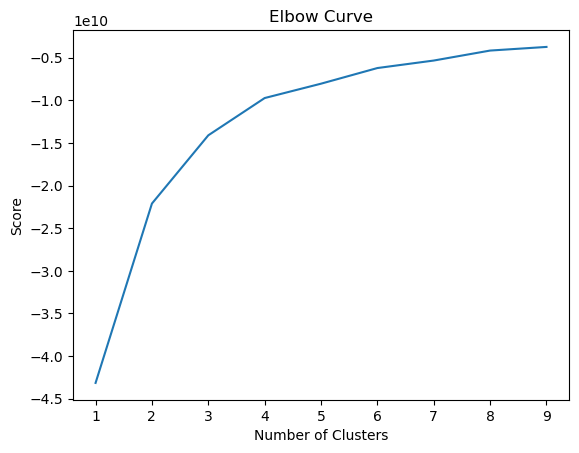

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There are jumps from two to three and three to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters might be 3 or 4? I'll go with 3 as the jump from 2 to 3 is more significant in size.

# 4. Standardizing Variable Scales

**Why does this matter?**

If one feature has a much larger range (e.g., price for 2 people in hundreds vs. rate in single digits), it will dominate the distance calculations, making the clustering biased toward that feature.

In [158]:
df_standard = df_zomato_numeric[
    [
        "rate",
        "votes",
        "approx_cost_2ppl",
    ]
].copy()

In [160]:
#Simple Check
df_standard.describe()

,rate,votes,approx_cost_2ppl
count,51148.000000,51148.000000,51148.000000
mean,3.701709,284.917885,556.043736
std,0.395188,806.495210,439.555299
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700449,41.000000,400.000000
75%,3.900000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [162]:
# Clustering into 3 clusters & standardizing

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting the relevant features
X = df_standard[['rate', 'votes', 'approx_cost_2ppl']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Getting cluster labels
df_standard['cluster'] = kmeans.labels_

In [164]:
# display all unique values in the "cluster" column
cluster = df_standard["cluster"].unique()

In [166]:
cluster

array([0, 1, 2], dtype=int32)

In [168]:
df_standard['cluster'].value_counts()

cluster
0    33523
2    11311
1     6314
Name: count, dtype: int64

In [148]:
# Clustering into 4 clusters & standardizing

# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# Selecting the relevant features
# X = df_standard[['rate', 'votes', 'approx_cost_2ppl']]

# Standardizing the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering
# kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# kmeans.fit(X_scaled)

# Getting cluster labels
# df_standard['cluster'] = kmeans.labels_

In [156]:
# display all unique values in the "cluster" column
# cluster = df_standard["cluster"].unique()

In [152]:
# cluster

In [154]:
# df_standard['cluster'].value_counts()

# 5. K-Means Clustering As Per Instructions

In [133]:
df_clustering = df_zomato_numeric[
    [
        "rate",
        "votes",
        "approx_cost_2ppl",
    ]
].copy()

In [135]:
# Create the k-means object for 3 clusters

kmeans = KMeans(n_clusters = 3) 

In [137]:
# Fit the k-means object to the data.

kmeans.fit(df_clustering)

KMeans(n_clusters=3)

In [139]:
df_clustering['clusters'] = kmeans.fit_predict(df_clustering)

In [141]:
df_clustering

,rate,votes,approx_cost_2ppl,clusters
0,4.100000,775,800,1
1,4.100000,787,800,1
2,3.800000,918,800,1
3,3.700000,88,300,0
4,3.800000,166,600,0
...,...,...,...,...
51143,3.600000,27,1500,0
51144,3.700449,0,600,0
51145,3.700449,0,2000,1
51146,4.300000,236,2500,1


In [143]:
df_clustering['clusters'].value_counts()

clusters
0    44376
1     6086
2      686
Name: count, dtype: int64

In [125]:
# Create the k-means object for 4 clusters

# kmeans = KMeans(n_clusters = 4) 

In [127]:
# Fit the k-means object to the data.

# kmeans.fit(df_clustering)

In [129]:
# df_clustering['clusters'] = kmeans.fit_predict(df_clustering)

In [131]:
# df_clustering['clusters'].value_counts()

### **Conclusion**

3 clusters might be more appropriate as one cluster has very few values

# 6. Plotting

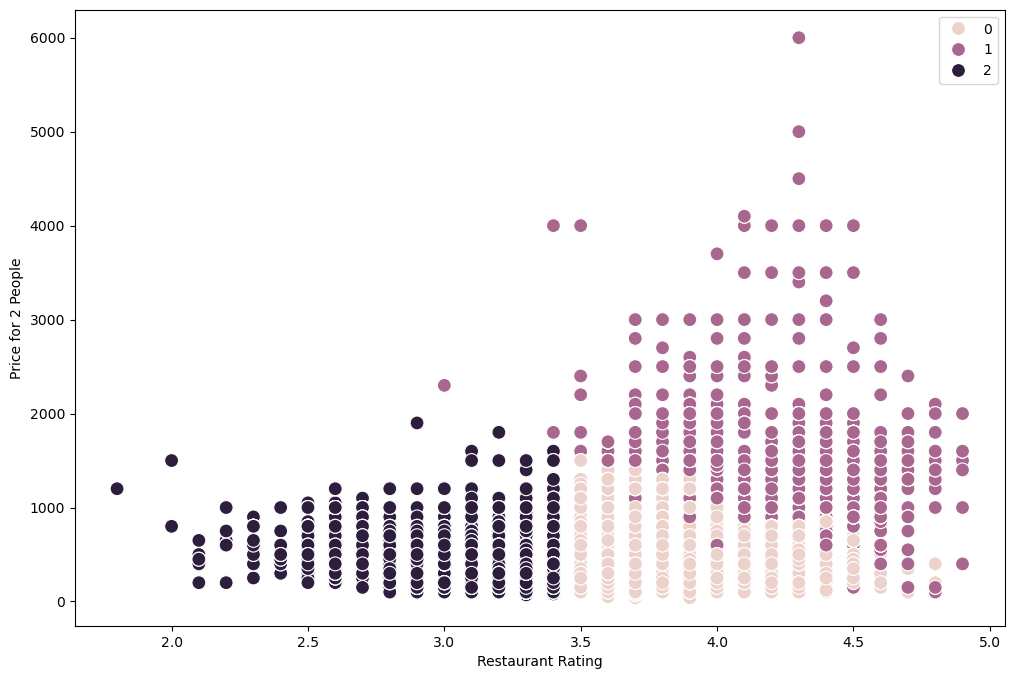

In [170]:
# Plotting the 3 clusters for the "approx_cost_2ppl" and "rate" variables from df_clustering

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['rate'], y=df_clustering['approx_cost_2ppl'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Restaurant Rating') # Label x-axis.
plt.ylabel('Price for 2 People') # Label y-axis.
plt.show()

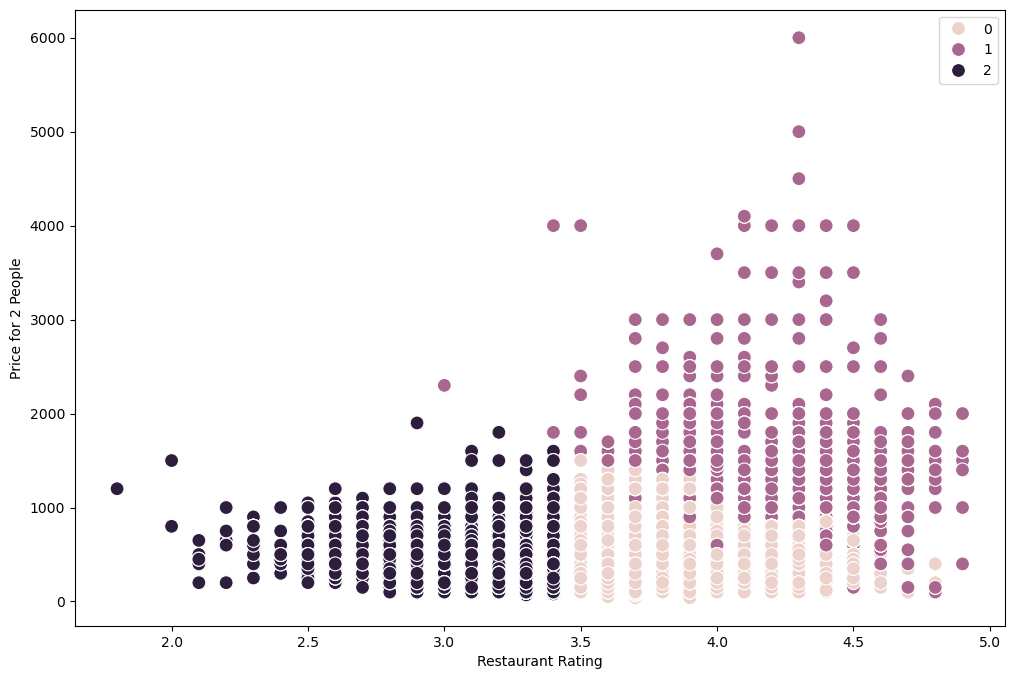

In [172]:
# Plotting the 3 clusters for the "approx_cost_2ppl" and "rate" variables from df_standard

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_standard['rate'], y=df_standard['approx_cost_2ppl'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Restaurant Rating') # Label x-axis.
plt.ylabel('Price for 2 People') # Label y-axis.
plt.show()

### **Observations:**

There's no noticeable difference between the scatterplot generated from df_clustering and df_standard, therefore I will disregard df_standard and use df_clustering for the other visualizations

**Clusters:**
- **Cluster 0 (Dark Purple):** This cluster tends towards restaurants with lower ratings (from 2.0 to around 3.5) and lower price points for two people (under 2000).
- **Cluster 1 (Purple):** Mostly includes restaurants with moderate ratings (from around 3.0 to about 4.5) and a wider range of price points for two people, suggesting variability in pricing even within similar rating ranges.
- **Cluster 2 (Light Purple):** Generally represents higher-rated restaurants (above 4.0) with more varied pricing spanning lower to higher cost brackets, suggesting that even well-rated restaurants can cater to different budget levels.

**Trends and Patterns:**
- There appears to be a slight trend where higher-rated restaurants (ratings above 4.0) tend to have above-average pricing, though there is significant variation in the data.
- Lower price points seem to cluster around lower ratings, while moderate to expensive restaurants show a broad spread across different ratings.

### **Interpretation:**

**Quality vs. Pricing:**
Higher-rated restaurants (clusters 1 and 2) tend to have both high and moderate pricing, reflecting diversity in pricing strategies that might suit different customer preferences. However, restaurants with lower ratings seem predominantly confined to lower pricing (cluster 0).

**Market Segmentation:**
The clustering provides insight into how restaurants might differentiate themselves on price against quality perceptions (ratings), benefiting business strategy development for positioning among different ratings and price groups.

**Consumer Insight:**
For consumers, the plot could help identify potential dining options based on their budget and desired restaurant quality (rating). If a consumer seeks higher quality and is flexible with the budget, clusters 1 and 2 offer options over a range of prices.

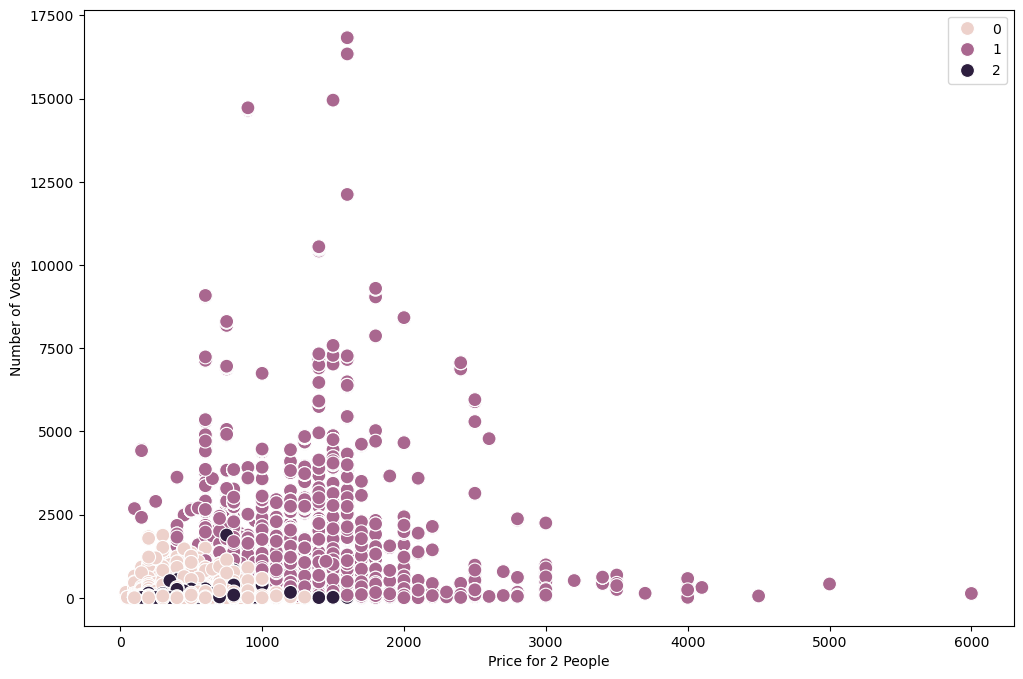

In [177]:
# Plotting the 3 clusters for the "approx_cost_2ppl" and "votes" variables from df_clustering

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['approx_cost_2ppl'], y=df_clustering['votes'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price for 2 People') # Label x-axis.
plt.ylabel('Number of Votes') # Label y-axis.
plt.show()

### **Observations:**

**Clusters:**
- **Cluster 0 (Dark Purple):** Primarily includes restaurants with a lower price (~under 2000) and lower vote counts, suggesting a less popular or possibly niche category without much exposure.
- **Cluster 1 (Purple):** Represents a broader spread across pricing from low to moderate levels (~under 4000) and generally higher vote counts, especially peaking in popularity around prices of ~1500 (with votes spanning up to 17500).
- **Cluster 2 (Light Purple):** Shows restaurants from low to moderate prices (~up to about 3000) but relatively lower vote counts, highlighting a parallel segment to cluster 1 but less voting popularity.

**Trends and Patterns:**
- Restaurants with moderate pricing tend to exhibit a wide range of popularity (as shown by votes), with cluster 1 showing high popularity despite variable pricing.
- There is also evidence of some high-priced restaurants (around 5000–6000) receiving lower votes, suggesting possible niche positioning without broad consumer engagement.
- The distribution across vote counts does not exhibit a strong linear pattern relative to pricing, indicating that votes might not always scale predictably with price increases.

### Interpretation:

**Popularity Metric:**
The number of votes serves as a crucial popularity metric for restaurants. Cluster 1 indicates that moderately priced restaurants (~1500–2000) are often highly popular, potentially providing a sweet spot for pricing strategy.

**Price Elasticity in Popularity:**
The variability in vote counts across various price points underscores the phenomenon where price does not strictly correlate with popularity; other factors likely influence voting behavior.

**Market Insight:**
Cluster 0 and cluster 2 suggest potential market segments with lower price and vote count alignment, perhaps indicative of restaurants targeting niche audiences or specific demographics that might not broadly engage in voting.

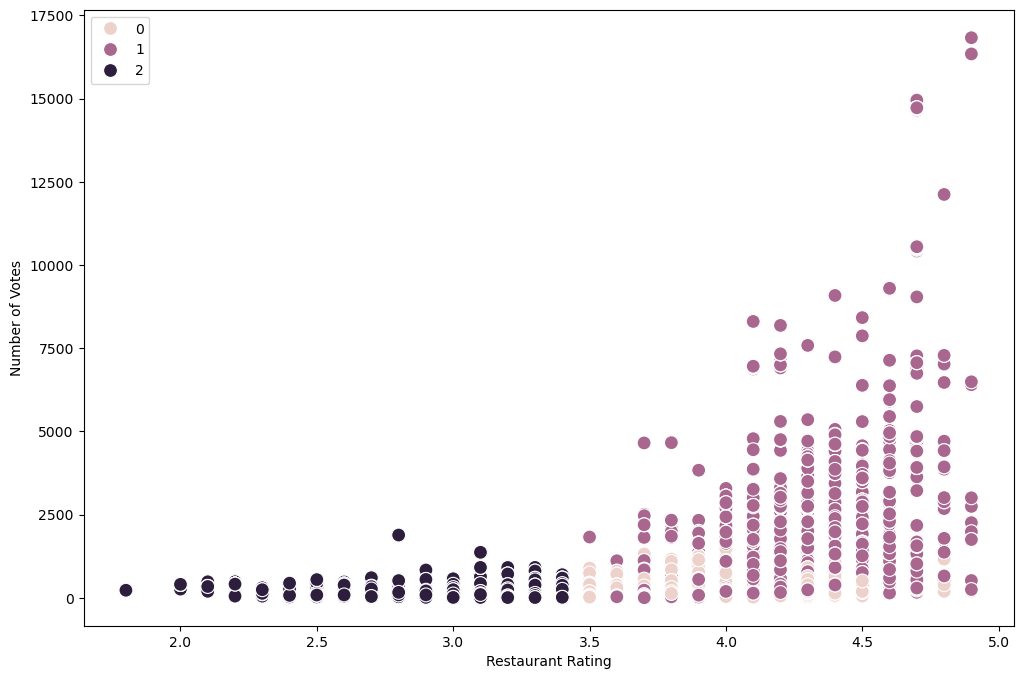

In [181]:
# Plotting the 3 clusters for the "rate" and "votes" variables from df_clustering

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clustering['rate'], y=df_clustering['votes'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Restaurant Rating') # Label x-axis.
plt.ylabel('Number of Votes') # Label y-axis.
plt.show()

### **Interpretation:**

**Clusters**:
- **Cluster 0 (darkest color)**: This cluster largely consists of restaurants with low ratings (below 3.5) and a relatively lower number of votes (mostly under 1000). This might represent less popular or averaged-rated restaurants.
- **Cluster 1 (lighter color, pink)**: Restaurants with mid-range ratings and votes are in this cluster. Ratings here appear to span from around 3.5 to 4.5, with a larger number of votes compared to cluster 0. This could highlight more popular or moderately well-rated restaurants.
- **Cluster 2 (lightest color, purple)**: The highest ratings generally exceeding 4.5 and receiving substantial votes (extending up to several thousands) are located in this cluster. These restaurants might be those that are highly rated and quite popular among diners.

**Cluster Trend**:
A general upward trend is visible, where higher rated restaurants tend to have a greater number of votes. This suggests that restaurant ratings might correlate positively with their popularity or customer involvement, as represented by the number of votes.

**Distribution**:
A large number of restaurants are concentrated within the 4.0-4.5 rating range, indicating this might be a common range for restaurants in the dataset.

### **Conclusion:**

The three plots provided offer insights into the relationships between restaurant ratings, prices for two people, and the number of votes (or reviews) the restaurants have received. Here are some conclusions that can be drawn from each plot:

**Plot 1 (Restaurant Rating vs Price for 2 People)**:
   - There is a general trend indicating that as the restaurant rating increases, the price for two people also tends to increase, albeit with some variability.
   - Restaurants with higher prices (above 2000) are predominantly in the higher rating range (above 3.5), while lower-priced restaurants show a wider range of ratings, indicating expensive restaurants are generally highly rated.
   - The color gradient suggests some classification or clustering of data points based on groups labeled as 0, 1, and 2. These groups could represent different types or tiers of restaurants.
   - Most high-priced restaurants (above 4000) seem to occupy higher ratings but are more sparse.

**Plot 2 (Price for 2 People vs Number of Votes)**:
   - There seems to be a cluster of restaurants priced between 1000 and 3000 receiving a higher number of votes, indicating mid-range priced restaurants are relatively popular.
   - Lower-priced restaurants (below 1000) typically receive fewer votes, suggesting less visibility or lower popularity.
   - As the price increases beyond 3000, the number of votes generally decreases, implying that very high-priced restaurants may not be as widely reviewed or are more exclusive.
   - Similar to the first plot, there exists a clustering based on the color gradient indicating some classification of data points.

**Plot 3 (Restaurant Rating vs Number of Votes)**:
   - Higher-rated restaurants (above 4.0) tend to receive more votes, which could suggest a correlation between popularity and high ratings.
   - A noticeable pattern is that lower-rated restaurants (<3.0) have fewer votes, potentially indicating they are less popular or lesser-known.
   - There is a wide distribution of votes for ratings around 3.0 to 4.5, indicating that various rating levels can still be associated with different levels of popularity.
   - Again, the color indicates data classification, which may highlight particular characteristics of each group of restaurants concerning rating and number of votes.

**Summary:**
Overall, these visualizations suggest that restaurant price and rating are interlinked with popularity as measured by votes. Moreover, the classification represented by colors could indicate different categories influenced by these parameters, which would require further contextual exploration to understand what each group represents (e.g., types of cuisine, locations, or service types).

### **Discuss how and why the clusters make sense.**

**Market Segmentation**:
**Price Segmentation**: 
Restaurants often target different market segments based on pricing strategies. For instance, budget-friendly eateries, mid-range casual dining, and premium fine dining establishments can naturally form distinct clusters. The varying density of data points in certain price ranges across plots suggests such segmentation.

**Rating Correlation**:
Higher-priced restaurants might be able to deliver superior dining experiences, reflected in higher ratings. This can create a cluster of highly-rated, high-priced restaurants. Additionally, budget eateries might not aim for top-tier ratings, resulting in lower-priced, lower-rated clusters.

**Popularity (Votes)**:
Mid-range price restaurants having a cluster with higher votes is common because they tend to balance quality and affordability, attracting a larger customer base and more reviews. Conversely, exclusive high-priced restaurants or very budget-friendly places might not be the focus of wide public review, as indicated by fewer votes.

### **Suggested Further Explorations:**

**Additional Variables**: 
Incorporating more variables such as geographic data, cuisine type, restaurant size, or customer demographics might clarify cluster distinctions.

**Qualitative Analysis**: 
Understanding clusters beyond numerical data through reviews, owner interviews, or customer feedback about these restaurants can shed light on the practical reasons behind clustering.

# 7. Descriptive Statistics

In [186]:
# calculate the descriptive statistics for the clusters in df_clustering using the groupby() function

# Calculating descriptive statistics for each cluster
cluster_stats = df_clustering.groupby('clusters').describe()

# Displaying the results
print(cluster_stats)


             rate                                                      votes  \
            count      mean       std  min  25%       50%  75%  max    count   
clusters                                                                       
0         44376.0  3.627558  0.355334  1.8  3.4  3.700449  3.8  4.9  44376.0   
1          6086.0  4.156493  0.272293  2.0  4.0  4.200000  4.3  4.9   6086.0   
2           686.0  4.463703  0.218376  3.7  4.3  4.500000  4.6  4.9    686.0   

                       ...                   approx_cost_2ppl               \
                 mean  ...      75%      max            count         mean   
clusters               ...                                                   
0           90.728975  ...   111.00   1161.0          44376.0   437.384510   
1         1116.290667  ...  1576.75   3286.0           6086.0  1338.440684   
2         5470.912536  ...  6438.25  16832.0            686.0  1290.670554   

                                                  

### **Propose what these results could be useful for in future steps of an analytics pipeline.**

Based on your results, we can analyze the three clusters in terms of restaurant rating (`rate`), number of votes (`votes`), and approximate cost for two people (`approx_cost_2ppl`).

#### **Cluster 0 (Majority Cluster - Lower Ratings & Lower Prices)**
- **Size**: 44,376 restaurants (largest cluster).
- **Rating**: Mean = **3.63**, Std = 0.36 (moderate but slightly lower ratings).
- **Votes**: Mean = **90.73** (restaurants in this cluster receive fewer reviews).
- **Cost for Two**: Mean = **₹437**, with a max of ₹1500.
- **Insight**: 
  - Likely represents budget-friendly restaurants with average-to-low ratings.
  - Potentially casual dining, street food vendors, or quick-service restaurants.
  - Might require marketing strategies to boost ratings and engagement.

#### **Cluster 1 (Mid-Tier, Highly Rated Restaurants)**
- **Size**: 6,086 restaurants.
- **Rating**: Mean = **4.16** (higher than Cluster 0).
- **Votes**: Mean = **1116.3** (significantly more user engagement than Cluster 0).
- **Cost for Two**: Mean = **₹1338**, with a max of ₹6000.
- **Insight**: 
  - Represents mid-range, well-rated restaurants.
  - These places are likely more popular and have better customer engagement.
  - Ideal for promotions, influencer marketing, or loyalty programs.

#### **Cluster 2 (Premium & High-End Restaurants)**
- **Size**: 686 restaurants (smallest but most distinct group).
- **Rating**: Mean = **4.46** (highest-rated cluster).
- **Votes**: Mean = **5470.9** (highest customer engagement).
- **Cost for Two**: Mean = **₹1290**, but the maximum cost is ₹2600.
- **Insight**:
  - Represents premium, fine-dining, or luxury restaurants.
  - High ratings indicate customer satisfaction, possibly due to superior food quality, service, and ambiance.
  - Marketing could focus on exclusivity, gourmet experiences, and premium clientele.

### **Possible Next Steps in the Analytics Pipeline**

**Additional Variables**: 
Incorporating more variables such as geographic data, cuisine type, restaurant size, or customer demographics might clarify cluster distinctions.

**Qualitative Analysis**: 
Understanding clusters beyond numerical data through reviews, owner interviews, or customer feedback about these restaurants can shed light on the practical reasons behind clustering.

**Targeted Marketing Strategies**:
   - Budget-friendly restaurants (Cluster 0) may need strategies to boost ratings and reviews.
   - High-end restaurants (Cluster 2) can focus on premium branding.
   - Mid-tier restaurants (Cluster 1) can leverage their popularity for customer loyalty programs.

**Recommendation Systems**:
   - Cluster 2 could be promoted for special occasions or fine dining.
   - Cluster 0 could be recommended for everyday affordable meals.

**Pricing Strategy Optimization**:
   - Restaurants in Cluster 0 may consider slight price adjustments to attract more customers.
   - Cluster 2 can focus on high-margin premium experiences.